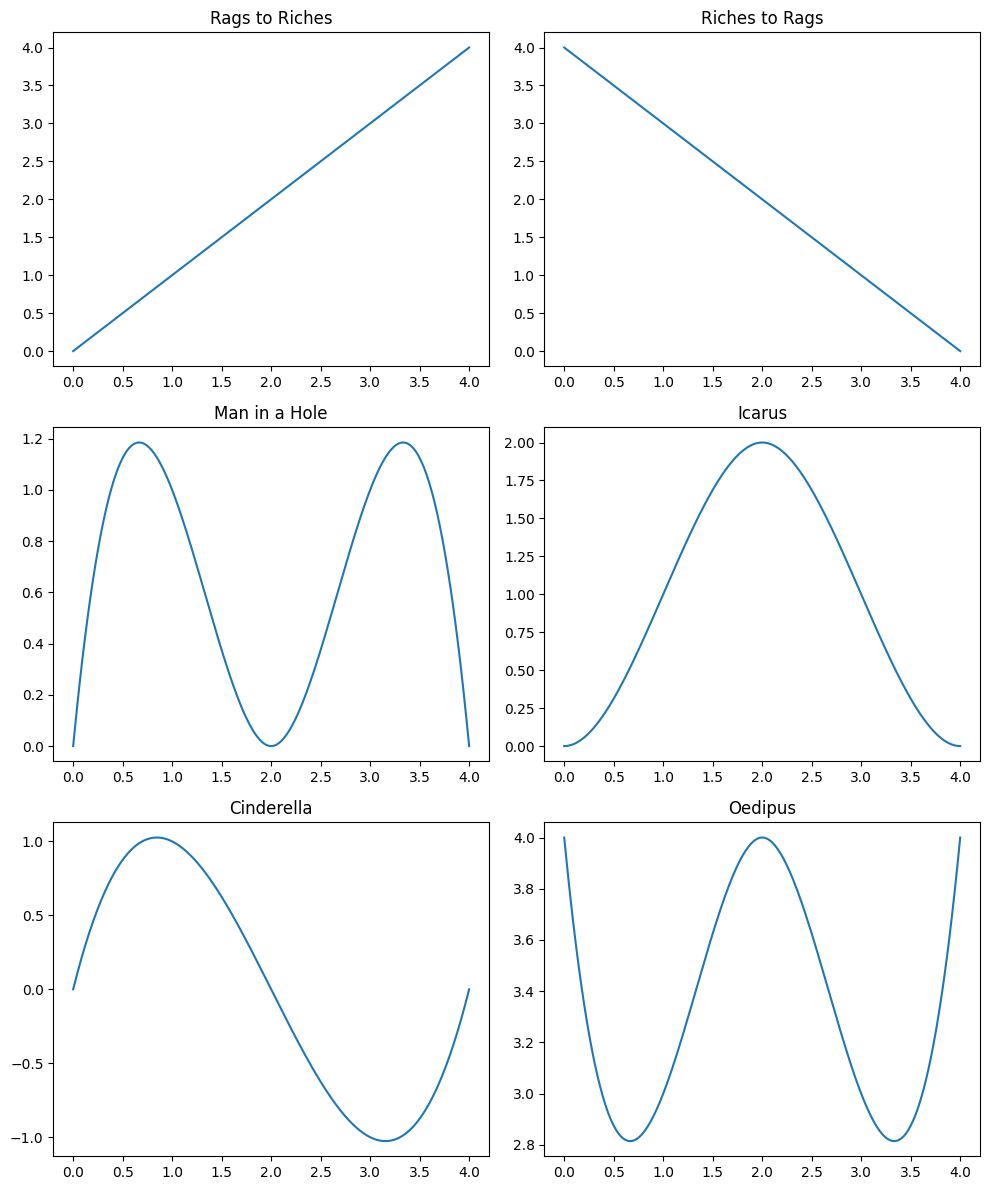

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Sample data
x = np.array([0, 1, 2, 3, 4])
y_rags_to_riches = np.array([0, 1, 2, 3, 4])
y_riches_to_rags = np.array([4, 3, 2, 1, 0])
y_man_in_a_hole = np.array([0, 1, 0, 1, 0])
y_icarus = np.array([0, 1, 2, 1, 0])
y_cinderella = np.array([0, 1, 0, -1, 0])
y_oedipus = np.array([4, 3, 4, 3, 4])

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Smooth the curves using cubic spline interpolation
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth_rags_to_riches = make_interp_spline(x, y_rags_to_riches)(x_smooth)
y_smooth_riches_to_rags = make_interp_spline(x, y_riches_to_rags)(x_smooth)
y_smooth_man_in_a_hole = make_interp_spline(x, y_man_in_a_hole)(x_smooth)
y_smooth_icarus = make_interp_spline(x, y_icarus)(x_smooth)
y_smooth_cinderella = make_interp_spline(x, y_cinderella)(x_smooth)
y_smooth_oedipus = make_interp_spline(x, y_oedipus)(x_smooth)

# Plot each smoothed arc in a separate subplot
axs[0, 0].plot(x_smooth, y_smooth_rags_to_riches)
axs[0, 0].set_title('Rags to Riches')

axs[0, 1].plot(x_smooth, y_smooth_riches_to_rags)
axs[0, 1].set_title('Riches to Rags')

axs[1, 0].plot(x_smooth, y_smooth_man_in_a_hole)
axs[1, 0].set_title('Man in a Hole')

axs[1, 1].plot(x_smooth, y_smooth_icarus)
axs[1, 1].set_title('Icarus')

axs[2, 0].plot(x_smooth, y_smooth_cinderella)
axs[2, 0].set_title('Cinderella')

axs[2, 1].plot(x_smooth, y_smooth_oedipus)
axs[2, 1].set_title('Oedipus')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Matching percentages for Book 01- Echoes of Tomorrow.txt:
Rags To Riches: 4.88%
Riches To Rags: 3.83%
Man In A Hole: 4.41%
Icarus: 3.59%
Cinderella: 2.09%
Oedipus: 0.70%


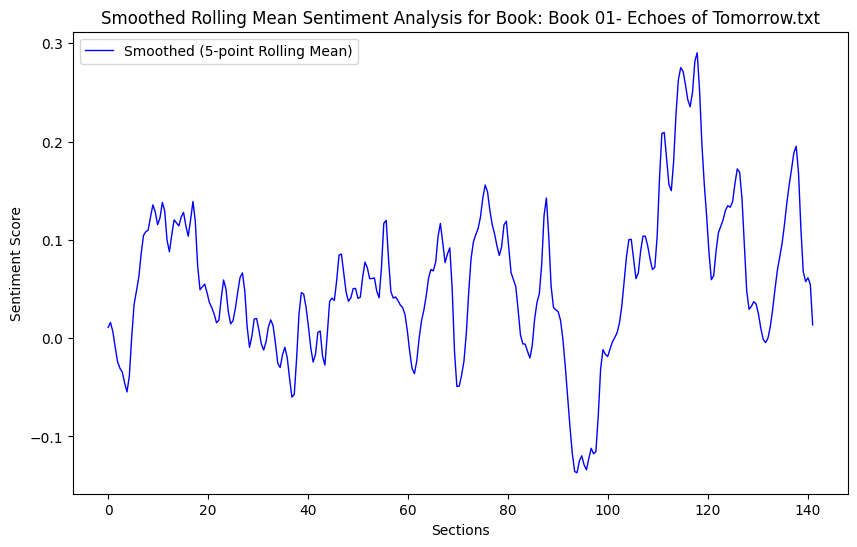

Matching percentages for Book 02 - Whispers of the Abyss.txt:
Rags To Riches: 8.79%
Riches To Rags: 6.66%
Man In A Hole: 8.35%
Icarus: 2.23%
Cinderella: 7.86%
Oedipus: 10.41%


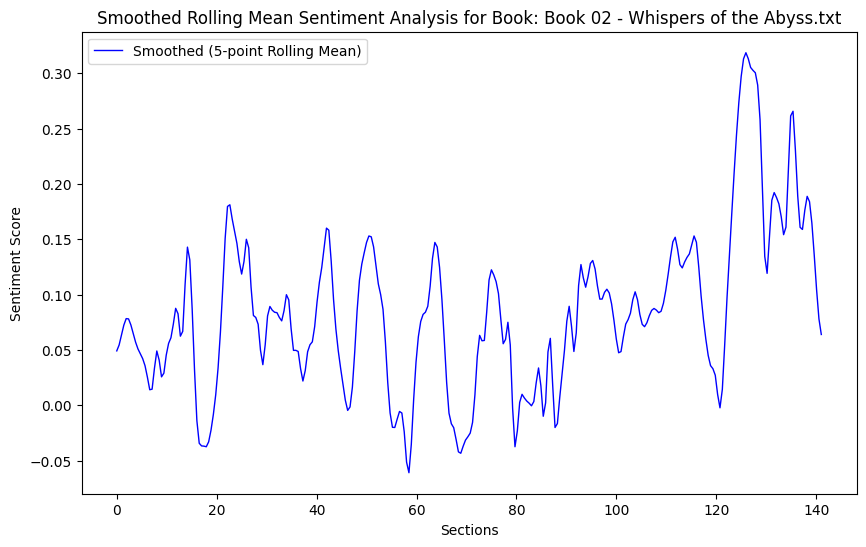

Matching percentages for Book 03 - Shadows of the Horizon.txt:
Rags To Riches: 11.43%
Riches To Rags: 11.38%
Man In A Hole: 11.51%
Icarus: 10.75%
Cinderella: 12.72%
Oedipus: 9.27%


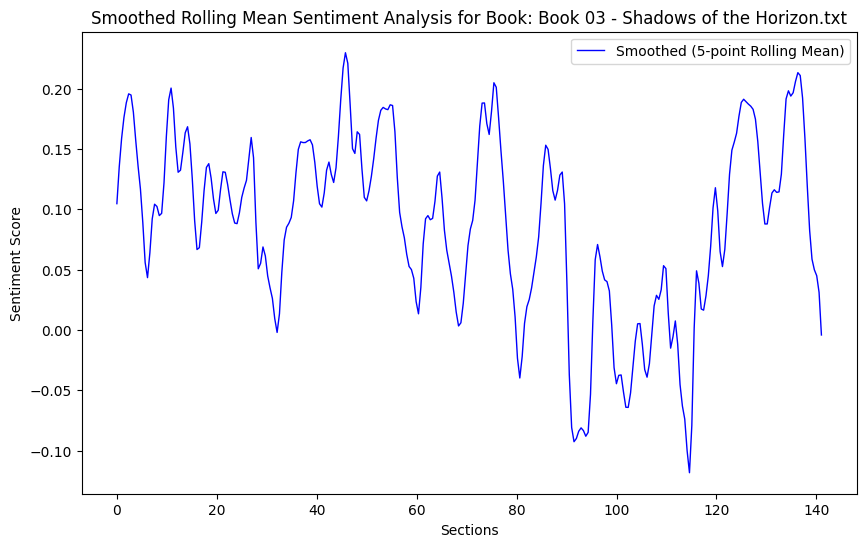

Matching percentages for Book 04 - Luminance of the Void.txt:
Rags To Riches: 13.00%
Riches To Rags: 15.57%
Man In A Hole: 8.76%
Icarus: 11.52%
Cinderella: 8.95%
Oedipus: 14.27%


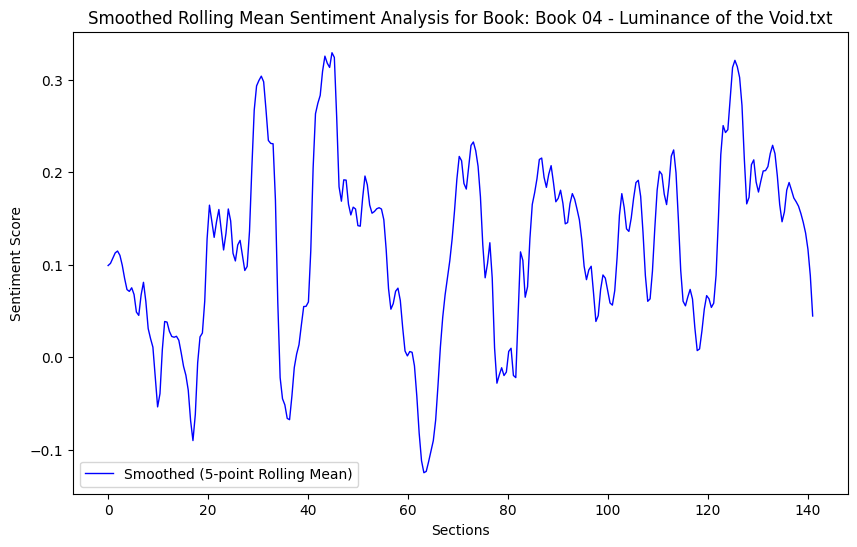

Matching percentages for Book 05- Whirlwinds of Time.txt:
Rags To Riches: 3.46%
Riches To Rags: 2.24%
Man In A Hole: 4.70%
Icarus: 4.56%
Cinderella: 4.39%
Oedipus: 0.86%


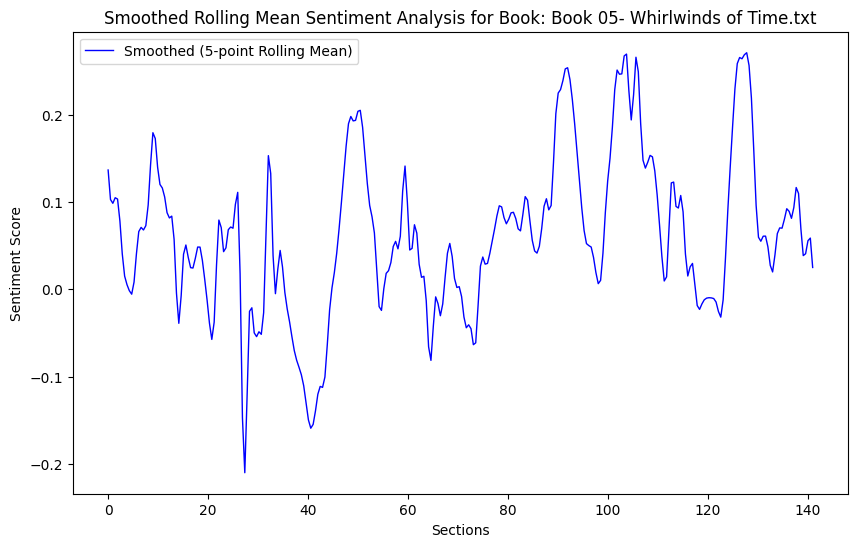

In [4]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.interpolate import make_interp_spline

# Load and preprocess text files
def load_text(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text
    
def preprocess_text(text):
    # Perform any necessary preprocessing steps here (e.g., lowercasing, removing punctuation, etc.)
    return text

# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# List of text file paths
book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

# Divide texts into sections
num_sections = 140

arc_patterns = {
    "rags_to_riches": [10, 30, 50, 70, 100],
    "riches_to_rags": [120, 110, 90, 70, 40],
    "man_in_a_hole": [20, 50, 80, 60, 110],
    "icarus": [10, 40, 70, 100, 120],
    "cinderella": [5, 30, 60, 100, 130],
    "oedipus": [10, 50, 70, 90, 130]
}

# Create sentiment analysis charts with smoothed curve lines for each book
for i, file_name in enumerate(book_file_names):
    book = {}  # Create a dictionary to store book information

    # Load book text from file
    text = load_text(file_name)
    preprocessed_text = preprocess_text(text)

    sentiment_scores = analyze_sentiment(preprocessed_text)
    book['sentiment'] = sentiment_scores

    section_size = len(preprocessed_text) // num_sections
    sections = [preprocessed_text[i:i + section_size] for i in range(0, len(preprocessed_text), section_size)]
    book['sections'] = sections

    x = np.linspace(0, len(sections), len(sections))  # Linear section numbering
    y = [analyze_sentiment(section) for section in sections]

    # Calculate the smoothed rolling mean line
    rolling_window = 5  # Change this value to adjust the rolling window size
    rolling_mean = np.convolve(y, np.ones(rolling_window)/rolling_window, mode='same')

    # Plot settings
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    tck = make_interp_spline(x, rolling_mean)
    x_new = np.linspace(min(x), max(x), 300)  # Increase the number of points for smoother curve
    y_smooth = tck(x_new)

    # Plot the smoothed curve with circular bends
    plt.plot(x_new, y_smooth, 'b-', linewidth=1, label=f'Smoothed ({rolling_window}-point Rolling Mean)')

    plt.xlabel('Sections')
    plt.ylabel('Sentiment Score')
    plt.title(f'Smoothed Rolling Mean Sentiment Analysis for Book: {file_name}')
    plt.legend()

    # Calculate the positions of custom x-axis ticks
    custom_xticks_interval = 20  # Change this value to your desired interval
    custom_xticks = np.arange(0, len(sections), custom_xticks_interval)

    # Set the x-axis ticks and labels
    plt.xticks(custom_xticks, custom_xticks)

    matching_percentages = {}
    for pattern_name, section_indices in arc_patterns.items():
        matching_scores = [y_smooth[section_index] for section_index in section_indices if 0 <= section_index < len(x_new)]
        pattern_average = np.mean(matching_scores)
        matching_percentages[pattern_name] = pattern_average

    # Print matching percentages for each arc pattern
    print(f"Matching percentages for {file_name}:")
    for pattern_name, percentage in matching_percentages.items():
        print(f"{pattern_name.replace('_', ' ').title()}: {percentage * 100:.2f}%")

    plt.show()

Matching percentages for Book 01- Echoes of Tomorrow.txt:
Rags To Riches: 4.65%
Riches To Rags: 7.41%
Man In A Hole: 6.29%
Icarus: 6.51%
Cinderella: 2.48%
Oedipus: 5.60%


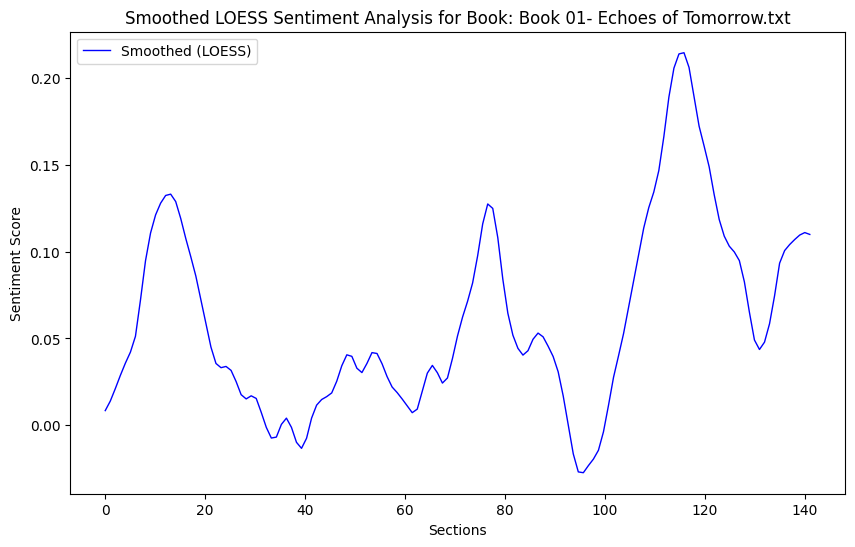

Matching percentages for Book 02 - Whispers of the Abyss.txt:
Rags To Riches: 6.24%
Riches To Rags: 8.16%
Man In A Hole: 7.30%
Icarus: 6.89%
Cinderella: 10.60%
Oedipus: 9.96%


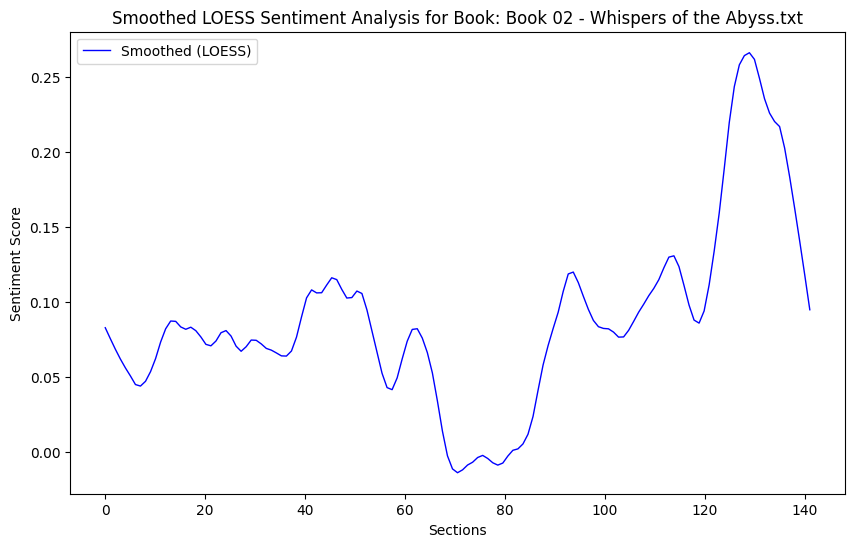

Matching percentages for Book 03 - Shadows of the Horizon.txt:
Rags To Riches: 8.18%
Riches To Rags: 7.99%
Man In A Hole: 8.38%
Icarus: 7.93%
Cinderella: 7.66%
Oedipus: 11.02%


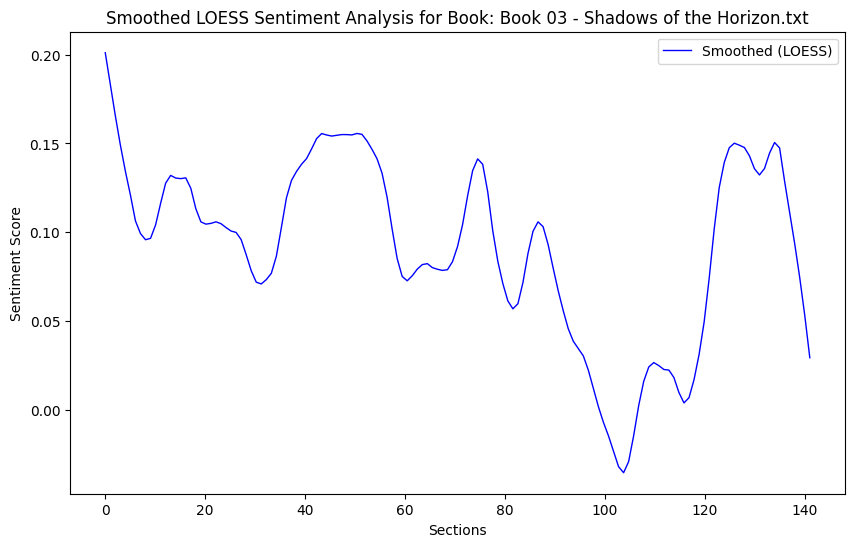

Matching percentages for Book 04 - Luminance of the Void.txt:
Rags To Riches: 10.46%
Riches To Rags: 11.97%
Man In A Hole: 7.98%
Icarus: 8.76%
Cinderella: 8.38%
Oedipus: 13.31%


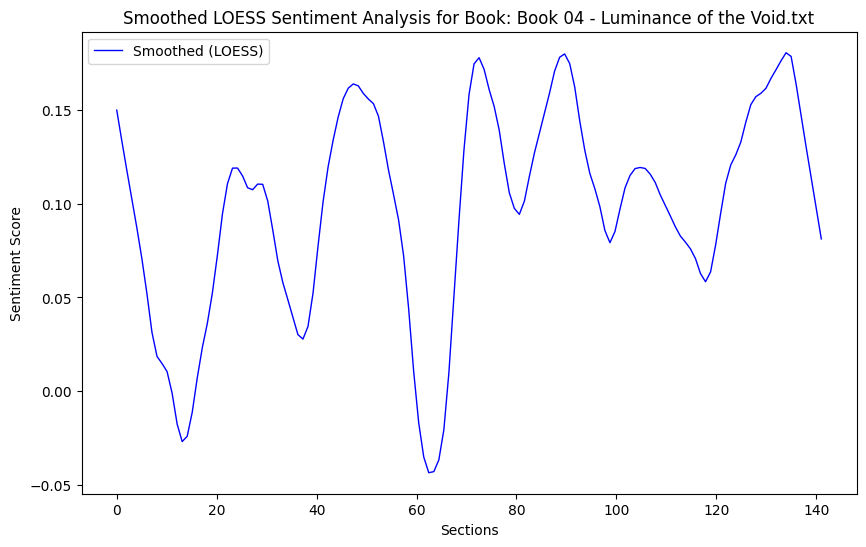

Matching percentages for Book 05- Whirlwinds of Time.txt:
Rags To Riches: 4.40%
Riches To Rags: 3.44%
Man In A Hole: 5.53%
Icarus: 0.86%
Cinderella: 5.43%
Oedipus: 7.73%


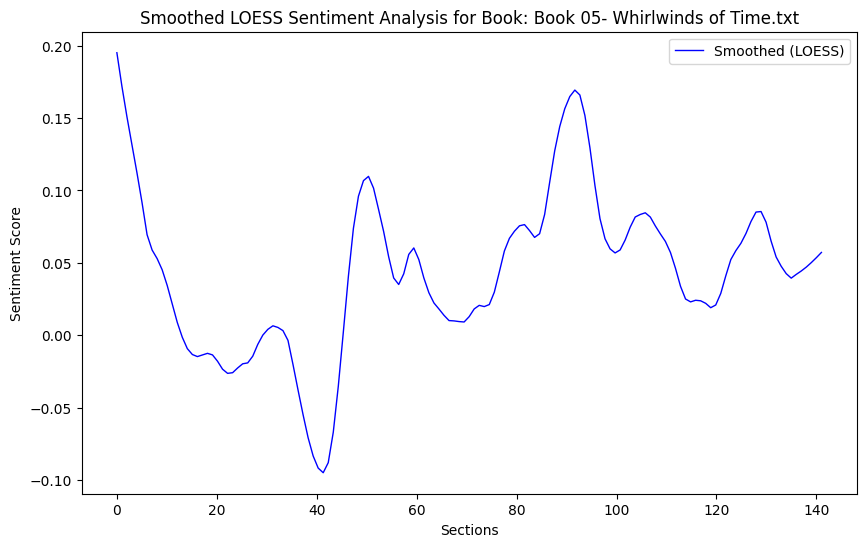

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.interpolate import make_interp_spline
from statsmodels.nonparametric.smoothers_lowess import lowess
# Load and preprocess text files
def load_text(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text
    
def preprocess_text(text):
    # Perform any necessary preprocessing steps here (e.g., lowercasing, removing punctuation, etc.)
    return text

# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# List of text file paths
book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

# Divide texts into sections
num_sections = 140

arc_patterns = {
    "rags_to_riches": [10, 30, 50, 70, 100],
    "riches_to_rags": [120, 110, 90, 70, 40],
    "man_in_a_hole": [20, 50, 80, 60, 110],
    "icarus": [10, 40, 70, 100, 120],
    "cinderella": [5, 30, 60, 100, 130],
    "oedipus": [10, 50, 70, 90, 130]
}

# Create sentiment analysis charts with smoothed curve lines for each book
for i, file_name in enumerate(book_file_names):
    book = {}  # Create a dictionary to store book information

    # Load book text from file
    text = load_text(file_name)
    preprocessed_text = preprocess_text(text)

    sentiment_scores = analyze_sentiment(preprocessed_text)
    book['sentiment'] = sentiment_scores

    section_size = len(preprocessed_text) // num_sections
    sections = [preprocessed_text[i:i + section_size] for i in range(0, len(preprocessed_text), section_size)]
    book['sections'] = sections

    x = np.linspace(0, len(sections), len(sections))  # Linear section numbering
    y = [analyze_sentiment(section) for section in sections]

    # Calculate the LOESS smoothed line
    f = lowess(y, x, frac=0.1)  # You can adjust the 'frac' parameter for smoothing level

    # Plot settings
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Plot the smoothed curve
    plt.plot(f[:, 0], f[:, 1], 'b-', linewidth=1, label='Smoothed (LOESS)')

    plt.xlabel('Sections')
    plt.ylabel('Sentiment Score')
    plt.title(f'Smoothed LOESS Sentiment Analysis for Book: {file_name}')
    plt.legend()

    # Calculate the positions of custom x-axis ticks
    custom_xticks_interval = 20  # Change this value to your desired interval
    custom_xticks = np.arange(0, len(sections), custom_xticks_interval)

    # Set the x-axis ticks and labels
    plt.xticks(custom_xticks, custom_xticks)

    matching_percentages = {}
    for pattern_name, section_indices in arc_patterns.items():
        matching_scores = [f[section_index, 1] for section_index in section_indices if 0 <= section_index < len(f)]
        pattern_average = np.mean(matching_scores)
        matching_percentages[pattern_name] = pattern_average

    # Print matching percentages for each arc pattern
    print(f"Matching percentages for {file_name}:")
    for pattern_name, percentage in matching_percentages.items():
        print(f"{pattern_name.replace('_', ' ').title()}: {percentage * 100:.2f}%")

    plt.show()